# NearMiss

In [1]:
import seaborn as sns

sns.set_context("poster")

In [2]:
def make_plot_despine(ax):
    sns.despine(ax=ax, offset=10)
    ax.set_xlim([0, 3.5])
    ax.set_ylim([0, 3.5])
    ax.set_xticks(np.arange(0, 3.6, 0.5))
    ax.set_yticks(np.arange(0, 3.6, 0.5))
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.legend(loc="upper left")

Start by generating some data to later illustrate the principle



In [3]:
import numpy as np

rng = np.random.RandomState(18)

X_minority = np.transpose(
    [[1.1, 1.3, 1.15, 0.8, 0.8, 0.6, 0.55], [1.0, 1.5, 1.7, 2.5, 2.0, 1.2, 0.55]]
)
X_majority = np.transpose(
    [
        [2.1, 2.12, 2.13, 2.14, 2.2, 2.3, 2.5, 2.45],
        [1.5, 2.1, 2.7, 0.9, 1.0, 1.4, 2.4, 2.9],
    ]
)

## NearMiss-1

NearMiss-1 selects samples from the majority class for which the average
distance to some nearest neighbours is the smallest. In the following
example, we use a 3-NN to compute the average distance on 2 specific samples
of the majority class. Therefore, in this case the point linked by the
green-dashed line will be selected since the average distance is smaller.



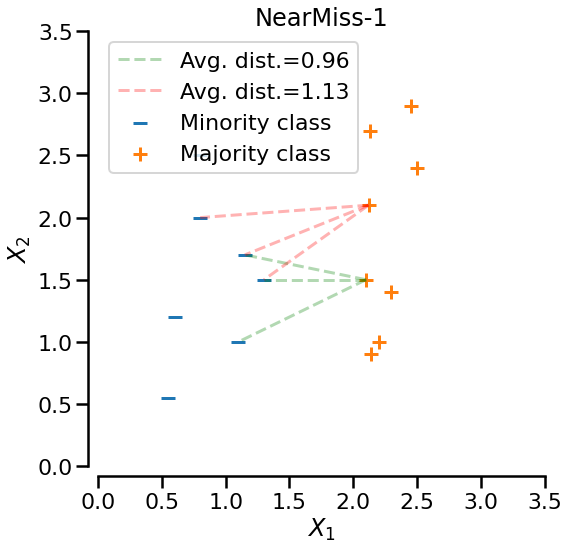

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-1")
make_plot_despine(ax)

## NearMiss-2

NearMiss-2 selects samples from the majority class for which the average
distance to the farthest neighbors is the smallest. With the same
configuration as previously presented, the sample linked to the green-dashed
line will be selected since its distance the 3 farthest neighbors is the
smallest.



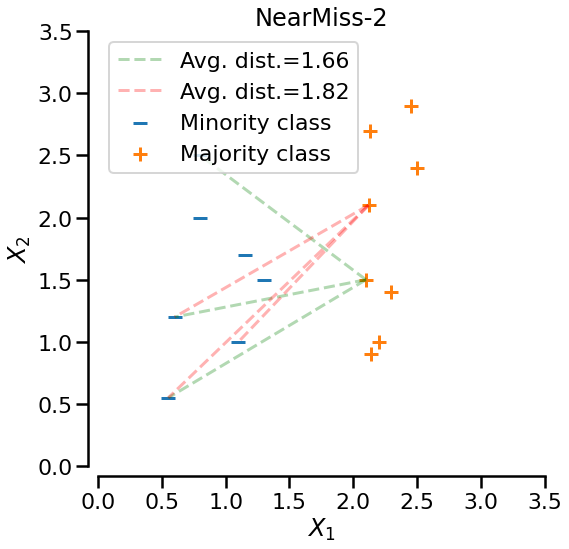

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=X_minority.shape[0])
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist = dist[:, -3::]
ind = ind[:, -3::]
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-2")
make_plot_despine(ax)

## NearMiss-3

NearMiss-3 can be divided into 2 steps. First, a nearest-neighbors is used to
short-list samples from the majority class (i.e. correspond to the
highlighted samples in the following plot). Then, the sample with the largest
average distance to the *k* nearest-neighbors are selected.



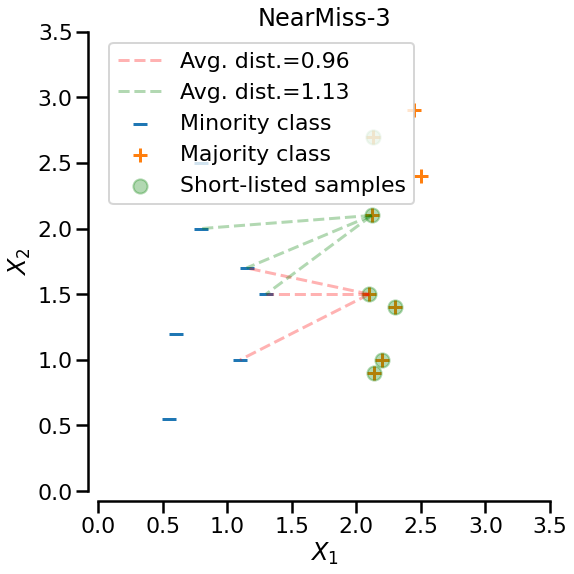

In [6]:
fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_majority)

# select only the majority point of interest
selected_idx = nearest_neighbors.kneighbors(X_minority, return_distance=False)
X_majority = X_majority[np.unique(selected_idx), :]
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Short-listed samples",
    s=200,
    alpha=0.3,
    color="g",
)
nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["r", "g"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-3")
make_plot_despine(ax)

fig.tight_layout()
plt.show()